# Seattle emergence calls challenge

In [6]:
import pandas as pd

firecalls_data_filename = "Seattle_Real_Time_Fire_911_Calls.csv"

print( pd.read_csv( firecalls_data_filename, nrows = 5 ) )

                 Address          Type                Datetime   Latitude  \
0             904 7th Av      Car Fire  05/22/2019 12:55:00 PM  47.606900   
1         9610 53rd Av S  Aid Response  05/22/2019 12:55:00 PM  47.515984   
2            106 Pike St  Aid Response  05/22/2019 12:57:00 PM  47.608849   
3            1902 2nd Av  Aid Response  07/01/2019 07:45:00 AM  47.610972   
4  4737 Roosevelt Way Ne      Unk Odor  07/01/2019 07:45:00 AM  47.663338   

    Longitude                Report Location Incident Number  
0 -122.329051    POINT (-122.329051 47.6069)      F190051945  
1 -122.266529  POINT (-122.266529 47.515984)      F190051946  
2 -122.339945  POINT (-122.339945 47.608849)      F190051950  
3 -122.340465  POINT (-122.340465 47.610972)      F190068848  
4 -122.317421  POINT (-122.317421 47.663338)      F190068849  


In [33]:
firecalls_data = pd.read_csv( firecalls_data_filename, usecols= ['Datetime','Type'])
print(firecalls_data)

                   Type                Datetime
0              Car Fire  05/22/2019 12:55:00 PM
1          Aid Response  05/22/2019 12:55:00 PM
2          Aid Response  05/22/2019 12:57:00 PM
3          Aid Response  07/01/2019 07:45:00 AM
4              Unk Odor  07/01/2019 07:45:00 AM
...                 ...                     ...
1570464    Trans to AMR  06/10/2021 08:53:00 AM
1570465    Aid Response  06/10/2021 08:57:00 AM
1570466    Aid Response  06/10/2021 08:57:00 AM
1570467  Medic Response  06/10/2021 08:58:00 AM
1570468  Medic Response  06/10/2021 09:00:00 AM

[1570469 rows x 2 columns]


In [34]:
example_date = firecalls_data['Datetime'][1].replace('PM','AM')
print ( example_date)
example_datetime = pd.to_datetime( example_date )
print( example_datetime)

05/22/2019 12:55:00 AM
2019-05-22 00:55:00


In [35]:
firecalls_data['Datetime'] = pd.to_datetime( firecalls_data['Datetime'] )
firecalls_data.set_index('Datetime', inplace = True)

In [38]:

print( firecalls_data.index )

DatetimeIndex(['2019-05-22 12:55:00', '2019-05-22 12:55:00',
               '2019-05-22 12:57:00', '2019-07-01 07:45:00',
               '2019-07-01 07:45:00', '2020-03-17 07:26:00',
               '2019-10-20 23:33:00', '2019-10-20 19:42:00',
               '2019-10-20 19:37:00', '2019-10-20 19:39:00',
               ...
               '2021-06-10 09:33:00', '2021-06-10 09:35:00',
               '2021-06-10 09:36:00', '2021-06-10 08:44:00',
               '2021-06-10 08:53:00', '2021-06-10 08:53:00',
               '2021-06-10 08:57:00', '2021-06-10 08:57:00',
               '2021-06-10 08:58:00', '2021-06-10 09:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=1570469, freq=None)


In [51]:
print( min(firecalls_data.index ))

2003-11-07 09:30:48


In [61]:
print ( firecalls_data.loc["2004"].shape[0])

78918


In [74]:
yearly_calls = pd.Series( [ firecalls_data.loc[str(year)].shape[0] for year in range(2003,2022) ], 
                         index=[ year for year in range(2003,2022) ] )
print(yearly_calls)

2003     11603
2004     78918
2005     79573
2006     83214
2007     81637
2008     81951
2009     80222
2010     79845
2011     79811
2012     84598
2013     88987
2014     93987
2015     98669
2016    101974
2017    102947
2018    101485
2019    102368
2020     93495
2021     45185
dtype: int64


In [76]:
import matplotlib.pylab as plt

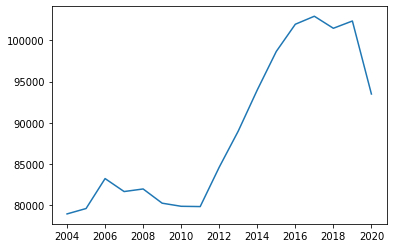

In [81]:

plt.plot( yearly_calls )

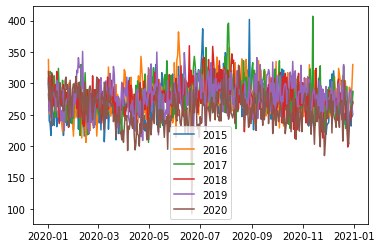

In [121]:
years = range(2015,2021)
for year in years:
    year_calls=firecalls_data.loc[str(year)].copy()
    year_calls["day"] = [ datetime.date() for datetime in year_calls.index ]
    daily_calls = pd.Series( year_calls["day"].value_counts() ).sort_index()
    daily_calls.index = [ date.replace( year=2020) for date in daily_calls.index ]
    plt.plot( daily_calls, label = str(year))
plt.legend()

In [123]:
def datetime2day( datetime ):
    return datetime.date()

def datetime2weekday( datetime ):
    return datetime.date.weekday()

def datetime2month( datetime ):
    return datetime.date.month()

In [125]:
firecalls_data["day"] = firecalls_data.index.apply( datetime2day )
print(firecalls_data)

AttributeError: 'DatetimeIndex' object has no attribute 'apply'

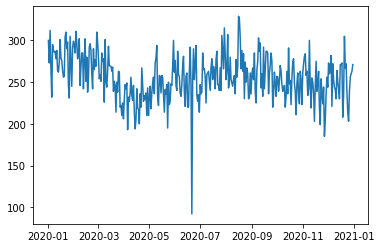

In [118]:
plt.plot(daily_calls)